# How to Normalize Data in Python

## Learning Objectives
Part of the objective of data preparation, is to transform our data in order to make it more suitable for machine learning. During this step, we often have to restructure some of our data so that it conforms to a particular characteristic. This is known as **normalization** or **standardization**. There are several ways to normalize data in Python. By the end of the tutorial, you will have learned:

+ how to perform min-max normalization
+ how to perform z-score normalization

In [1]:
import pandas as pd
vehicles = pd.read_csv("vehicles.csv")
vehicles.head()

,citympg,cylinders,displacement,drive,highwaympg,make,model,class,year,transmissiontype,transmissionspeeds,co2emissions
0,14.0,6,4.1,2-Wheel Drive,19.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,555.437500
1,14.0,8,5.0,2-Wheel Drive,20.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,555.437500
2,18.0,8,5.7,2-Wheel Drive,26.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,484.761905
3,21.0,6,4.3,Rear-Wheel Drive,31.0,Cadillac,Fleetwood/DeVille (FWD),Large Cars,1984,Automatic,4,424.166667
4,14.0,8,4.1,Rear-Wheel Drive,19.0,Cadillac,Brougham/DeVille (RWD),Large Cars,1984,Automatic,4,555.437500


In [2]:
vehicles[["co2emissions"]].describe

<bound method NDFrame.describe of        co2emissions
0        555.437500
1        555.437500
2        484.761905
3        424.166667
4        555.437500
...             ...
36974    442.000000
36975    466.000000
36976    503.000000
36977    661.000000
36978    546.000000

[36979 rows x 1 columns]>

<Axes: ylabel='Frequency'>

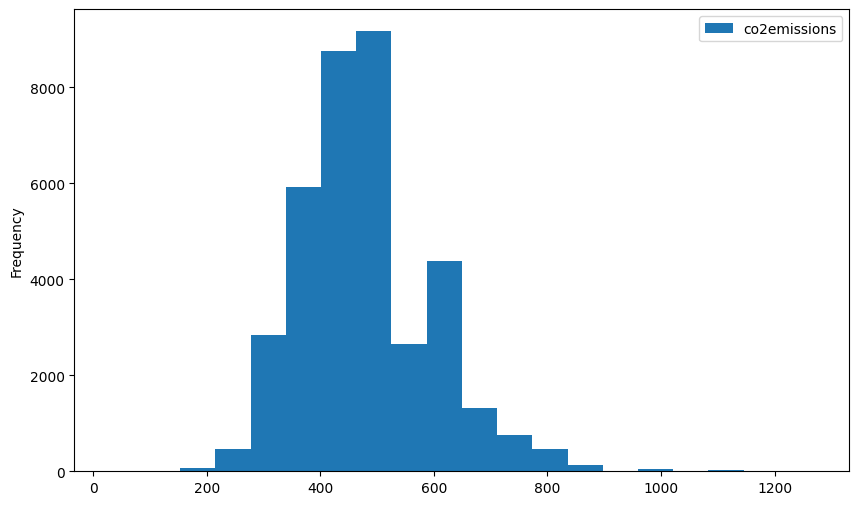

In [3]:
%matplotlib inline
vehicles[['co2emissions']].plot(kind = 'hist', 
                                bins = 20, 
                                figsize = (10, 6))

## How to perform min-max Normalization

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
co2emissions_mm = MinMaxScaler().fit_transform(vehicles[['co2emissions']])
co2emissions_mm

array([[0.42435082],
       [0.42435082],
       [0.36738062],
       ...,
       [0.38208199],
       [0.50944265],
       [0.41674344]])

In [19]:
co2_df = pd.DataFrame(co2emissions_mm, columns = ['co2emissions'])
co2_df

,co2emissions
0,0.424351
1,0.424351
2,0.367381
3,0.318536
4,0.424351
...,...
36974,0.332911
36975,0.352257
36976,0.382082
36977,0.509443


In [20]:
co2_df.describe()

,co2emissions
count,36979.000000
mean,0.360762
std,0.094949
min,0.000000
25%,0.299056
50%,0.353657
75%,0.424351
max,1.000000


<Axes: ylabel='Frequency'>

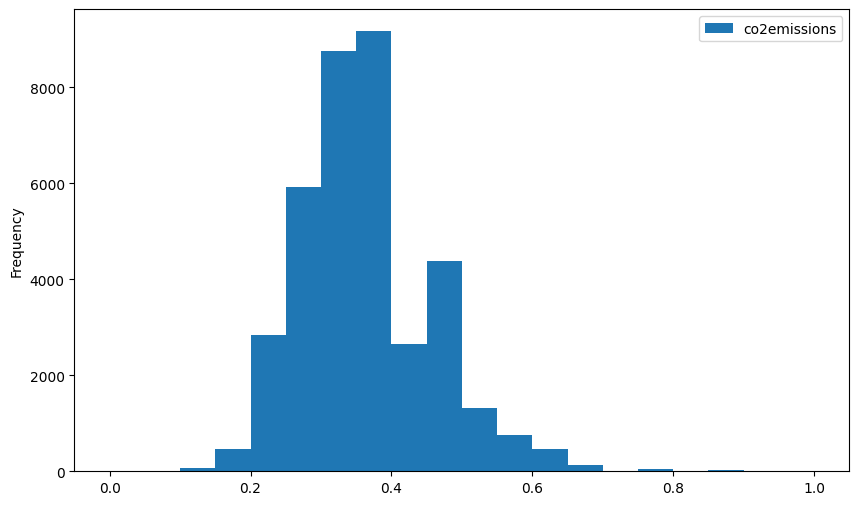

In [21]:
co2_df.plot(kind = 'hist', 
                     bins = 20, 
                     figsize = (10, 6))

## How to perform z-score Normalization

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
co2emissions_zm = StandardScaler().fit_transform(vehicles[['co2emissions']])
co2emissions_zm = pd.DataFrame(co2emissions_zm, columns = ['co2emissions'])
co2emissions_zm.describe()

,co2emissions
count,3.697900e+04
mean,-1.844617e-16
std,1.000014e+00
min,-3.799572e+00
25%,-6.498927e-01
50%,-7.482706e-02
75%,6.697254e-01
max,6.732510e+00


<Axes: ylabel='Frequency'>

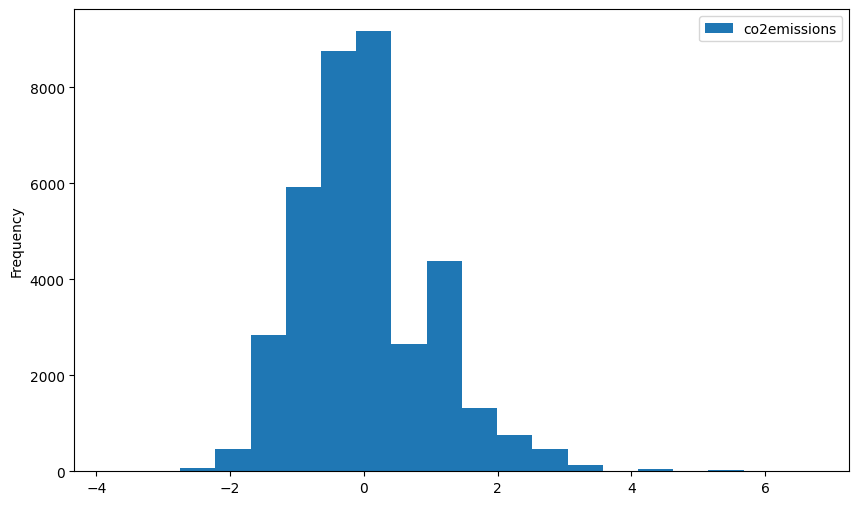

In [24]:
co2emissions_zm.plot(kind = 'hist', 
                     bins = 20, 
                     figsize = (10, 6))